# Graduate Admission Prediction-India

In [1]:

#importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
sns.set()
import warnings
warnings.simplefilter('ignore')
from scipy import stats

In [2]:
#loading the data as pandas dataframe
data=pd.read_csv("admission_data.csv")

In [3]:
#checking the first five rows of the data
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#checking the last five rows of the data
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
#checking the columns of the dataset
data.columns.values

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Chance of Admit '], dtype=object)

In [6]:
#checking the datatypes of the columns
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
# Checking the shape of the ddata
data.shape

(500, 8)

In [8]:
#checking the summary statistics
data.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Exploratory Data Analysis

In [10]:
# Checking the correlation coefficient of TOEFL Score with Chance of Admit
data.columns = data.columns.str.strip()
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [11]:
data[['TOEFL Score', 'Chance of Admit']].corr()

,TOEFL Score,Chance of Admit
TOEFL Score,1.000000,0.792228
Chance of Admit,0.792228,1.000000


<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

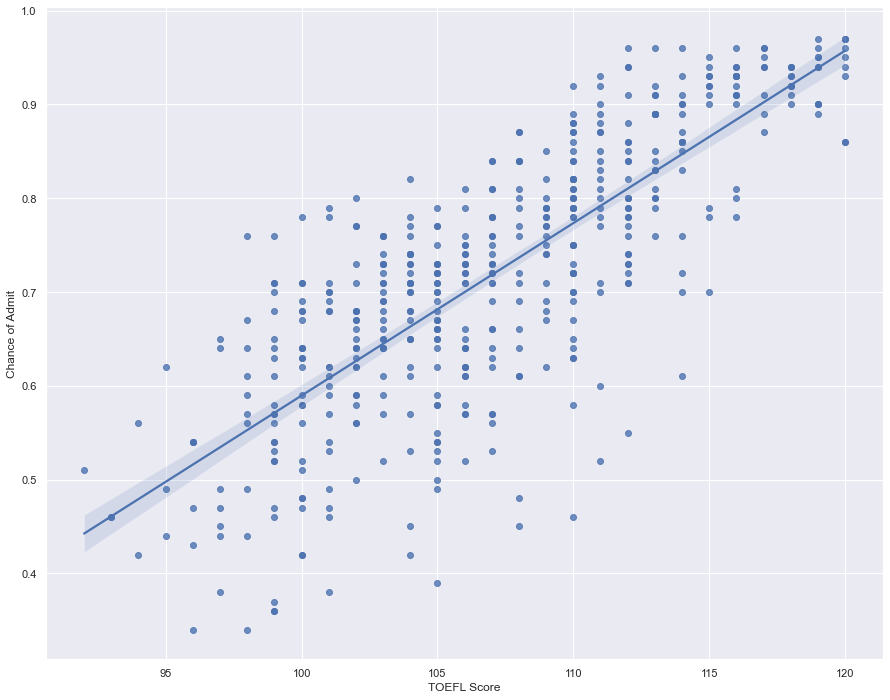

In [12]:
# Plotting the results using seaborn 
plt.figure(figsize=(15,12))
sns.regplot(x='TOEFL Score', y='Chance of Admit', data=data)

In [13]:
# Pearson Correlation Coefficient
p_coeff,p_value = stats.pearsonr(data['TOEFL Score'],data['Chance of Admit'] )
print('Pearson Coefficient:',p_coeff )
print('Pearson Value:',p_value)

Pearson Coefficient: 0.792227614305083
Pearson Value: 6.729926762328514e-109


In [14]:
# Checking the correlation coefficient of GRE Score with Chance of Admit
data[['GRE Score','Chance of Admit']].corr()

,GRE Score,Chance of Admit
GRE Score,1.000000,0.810351
Chance of Admit,0.810351,1.000000


<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

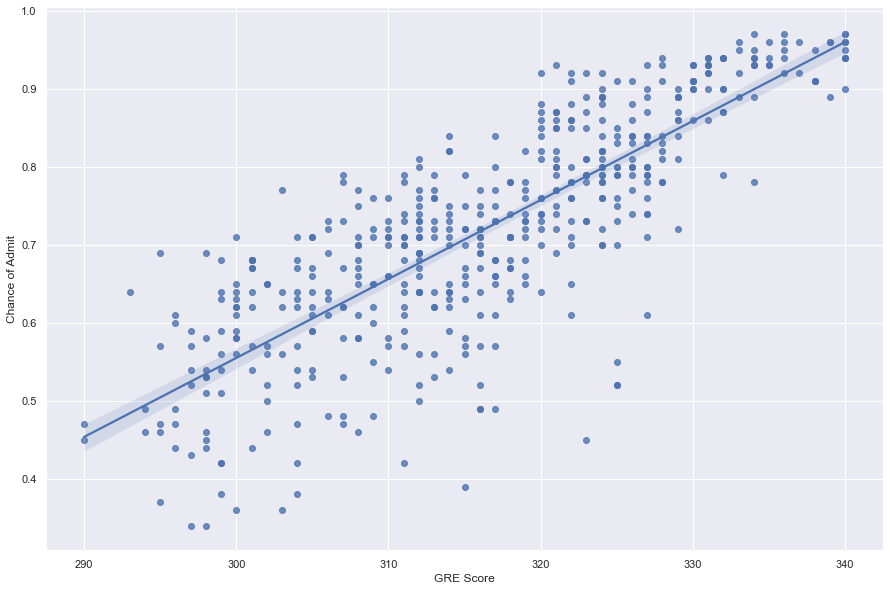

In [15]:
# Plotting the results using seaborn 
plt.figure(figsize=(15,10))
sns.regplot(x='GRE Score', y='Chance of Admit', data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

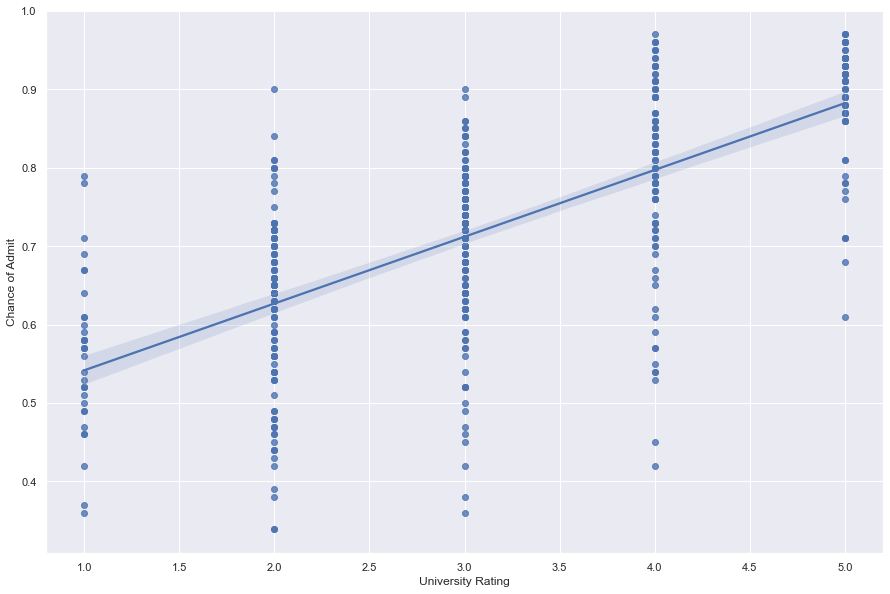

In [16]:
# University Rating vs Chance of Admit
plt.figure(figsize=(15,10))
sns.regplot(x='University Rating', y='Chance of Admit', data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

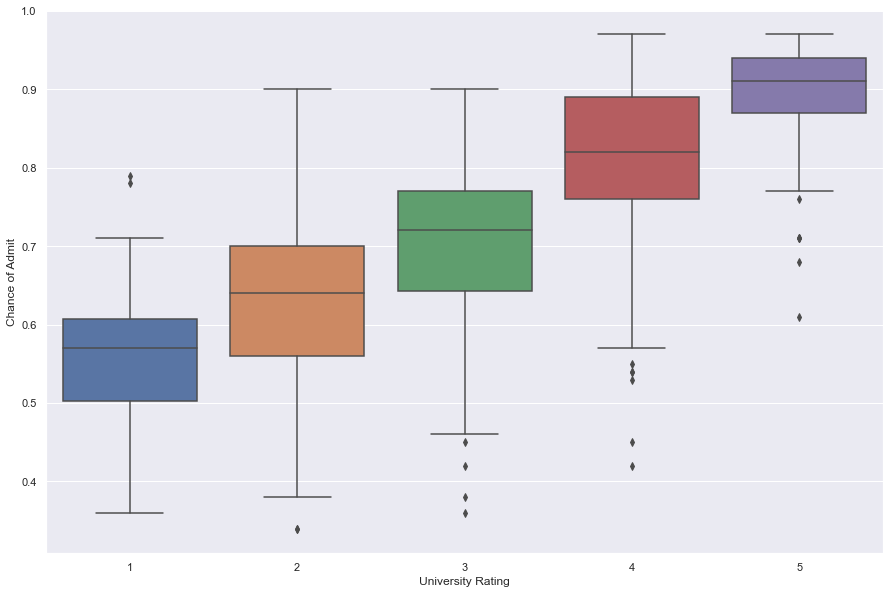

In [17]:
# Plotting using boxplot for better visualization
plt.figure(figsize=(15,10))
sns.boxplot(x='University Rating', y='Chance of Admit', data=data)

In [18]:
# Checking the correlation
data[['University Rating','Chance of Admit']].corr()

,University Rating,Chance of Admit
University Rating,1.000000,0.690132
Chance of Admit,0.690132,1.000000


In [19]:
#Checking the Pearson Correlation
coef,pvalue = stats.pearsonr(data['University Rating'],data['Chance of Admit'])
coef,pvalue

(0.690132368788689, 5.866255627650183e-72)

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

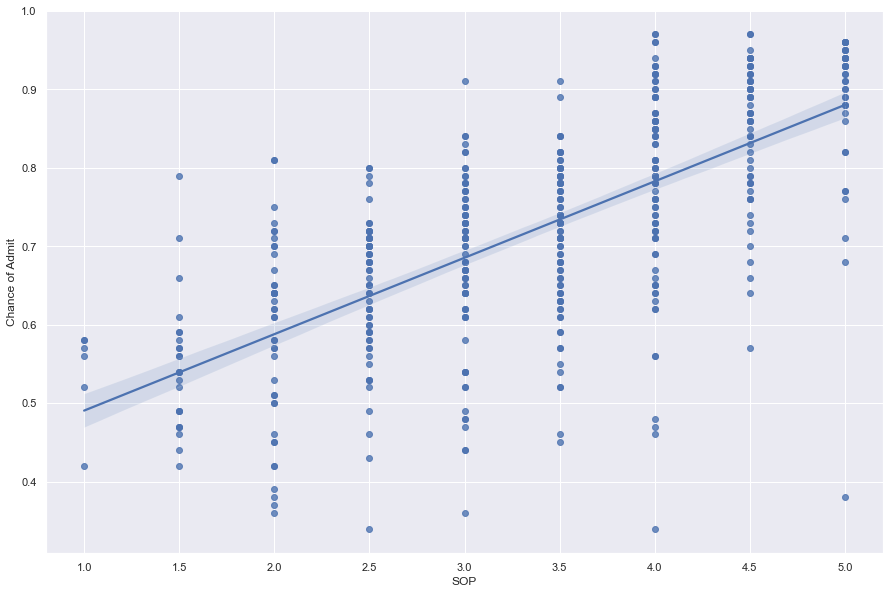

In [20]:
#plotting SOP vs Chance of Admit
plt.figure(figsize=(15, 10))
sns.regplot(data=data, x='SOP', y='Chance of Admit')

In [21]:
# Checking the correlation
data[['SOP', 'Chance of Admit']].corr()

,SOP,Chance of Admit
SOP,1.000000,0.684137
Chance of Admit,0.684137,1.000000


<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

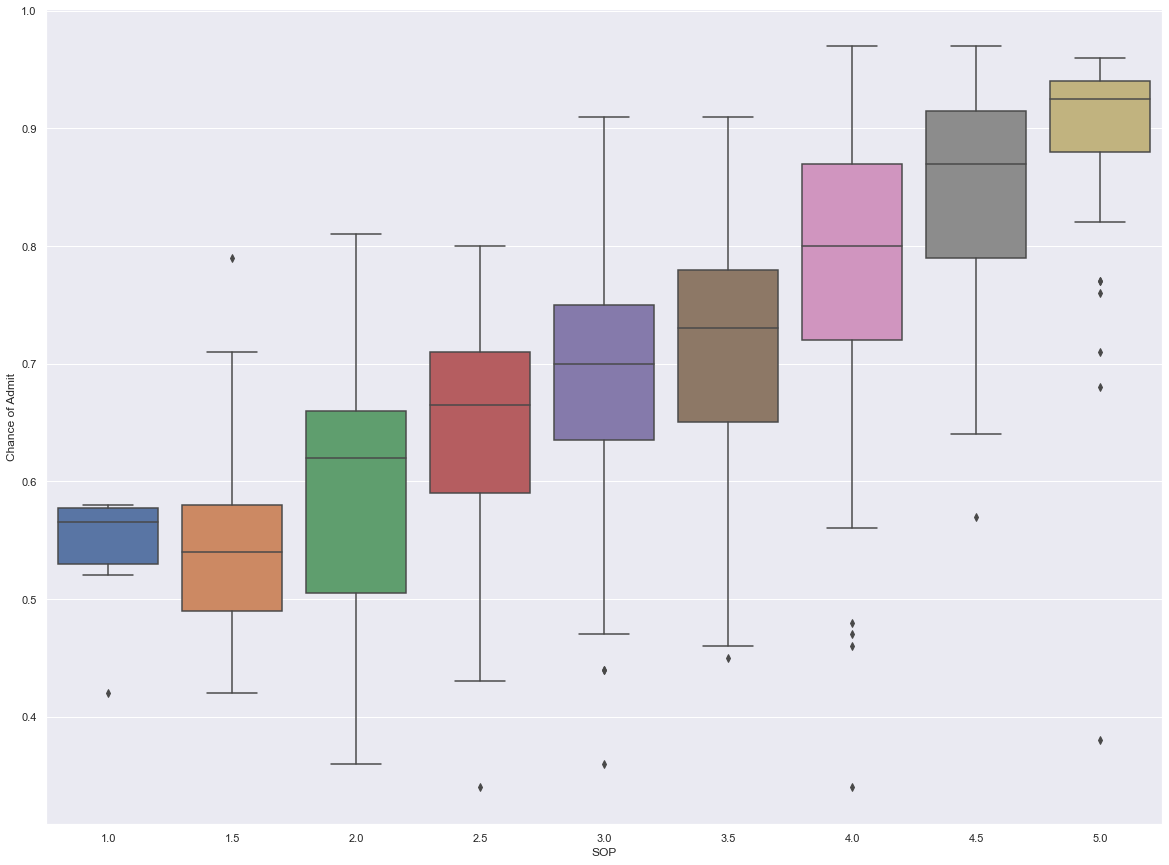

In [22]:
# plotting the column using boxplot
plt.figure(figsize=(20,15))
sns.boxplot(data=data, x='SOP', y='Chance of Admit')

In [23]:
# Pearson Correlation Coefficient
p_coeff,p_value = stats.pearsonr(data['SOP'],data['Chance of Admit'] )
print('Pearson Coefficient:',p_coeff )
print('Pearson Value:',p_value)

Pearson Coefficient: 0.6841365241316724
Pearson Value: 2.8859074534541132e-70


<AxesSubplot:xlabel='LOR', ylabel='Chance of Admit'>

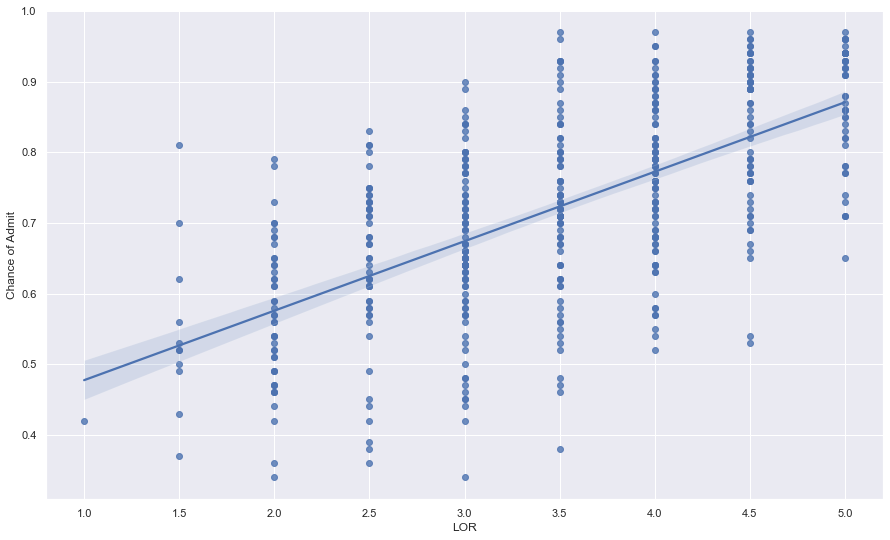

In [24]:
#LOR vs Chance of Admit
plt.figure(figsize=(15, 9))
sns.regplot(x=data.LOR, y=data['Chance of Admit'])

In [25]:
# Checking the correlation 
data[['LOR', 'Chance of Admit']].corr()

,LOR,Chance of Admit
LOR,1.000000,0.645365
Chance of Admit,0.645365,1.000000


In [26]:
# Pearson Correlation Coefficient
p_coeff, pvalue = stats.pearsonr(data.LOR, data['Chance of Admit'])
p_coeff, pvalue

(0.6453645135280106, 3.069932320299405e-60)

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

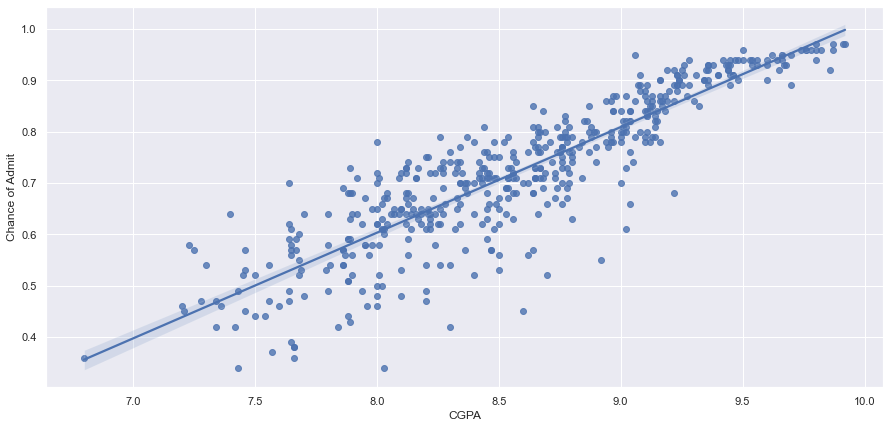

In [27]:
#CGPA vs Chance of Admit
plt.figure(figsize=(15,7))
sns.regplot(x=data.CGPA, y=data['Chance of Admit'])

In [28]:
# checking pearson correlation
data[['CGPA', 'Chance of Admit']].corr()

,CGPA,Chance of Admit
CGPA,1.000000,0.882413
Chance of Admit,0.882413,1.000000


In [29]:
p_coeff, pvalue = stats.pearsonr(data.CGPA, data['Chance of Admit'])
p_coeff, pvalue

(0.8824125749045743, 3.396544858710999e-165)

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

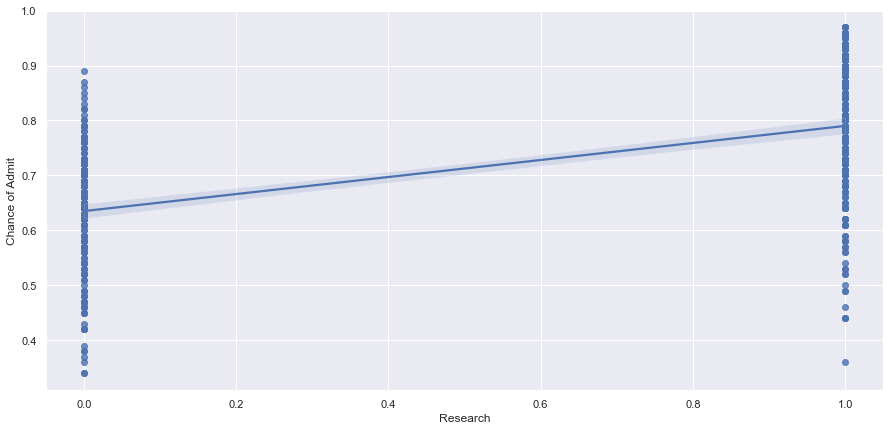

In [30]:
#Research vs Chance of Admit
plt.figure(figsize=(15, 7))
sns.regplot(x=data.Research, y=data['Chance of Admit'])

In [31]:
# Checking the correlation
data[['Research', 'Chance of Admit']].corr()

,Research,Chance of Admit
Research,1.000000,0.545871
Chance of Admit,0.545871,1.000000


<AxesSubplot:xlabel='Research', ylabel='count'>

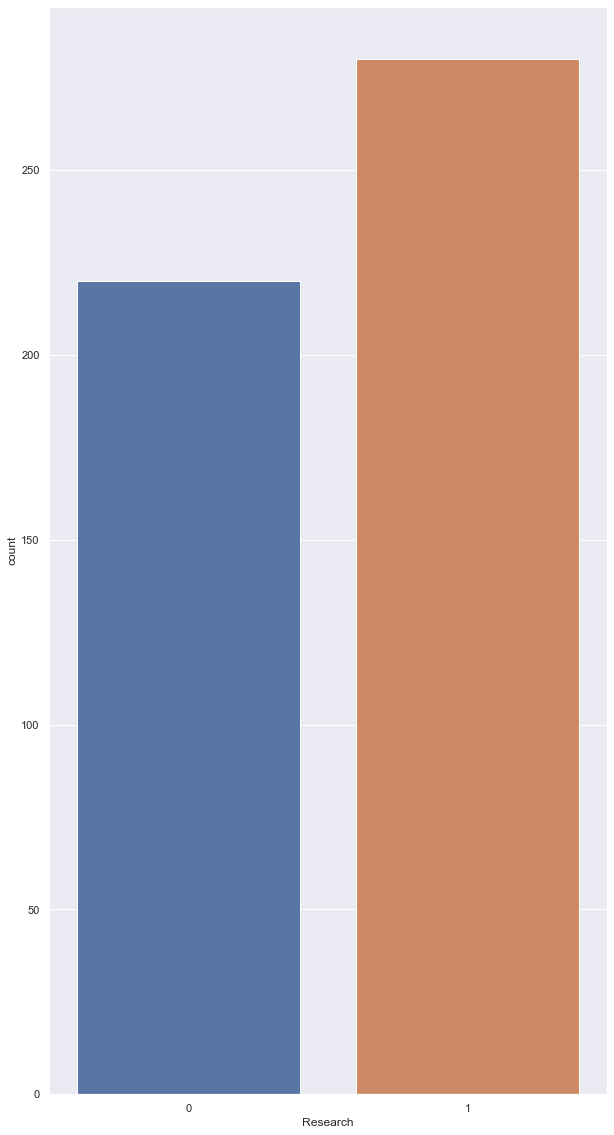

In [32]:
#Research countplot
plt.figure(figsize=(10,20))
sns.countplot(x=data.Research)

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

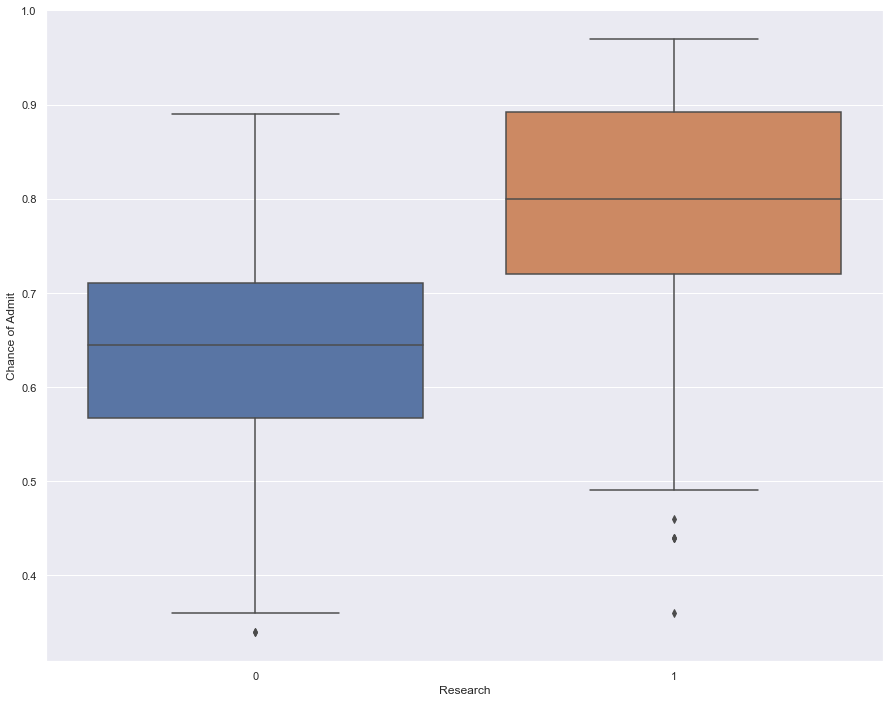

In [33]:
plt.figure(figsize=(15, 12))
sns.boxplot(x=data.Research, y=data['Chance of Admit'])

# Heatmap

<AxesSubplot:>

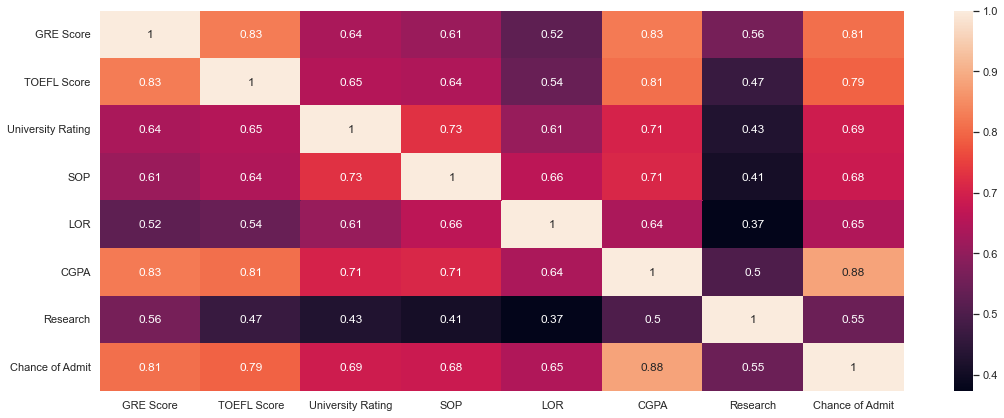

In [34]:
#Checking the heatmap of correlation for all the columns or features
plt.figure(figsize=(18, 7))
sns.heatmap(data.corr(), annot=True)

# GRE Score and CGPA

<AxesSubplot:title={'center':'Relationship between CGPA and GRE Score'}, xlabel='GRE Score', ylabel='CGPA'>

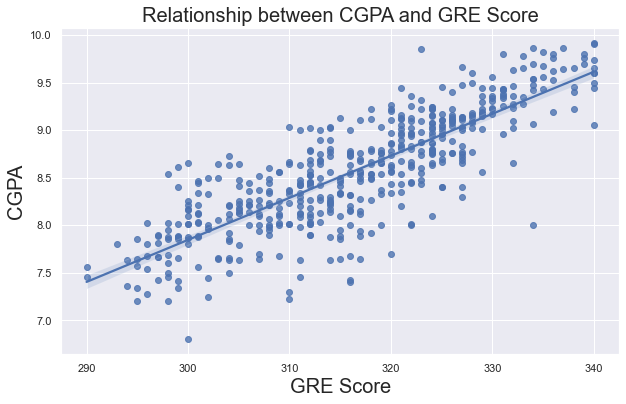

In [35]:
plt.figure(figsize=(10,6))
plt.title('Relationship between CGPA and GRE Score', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
sns.regplot(x=data['GRE Score'], y=data.CGPA)

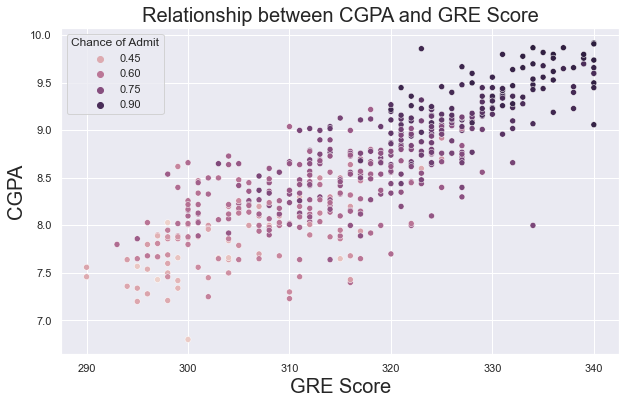

In [36]:
# Comparing the above plot with the Chance of Admission
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GRE Score'],y=data.CGPA, hue=data['Chance of Admit'])
plt.title('Relationship between CGPA and GRE Score', fontsize=20)
plt.xlabel('GRE Score', fontsize=20)
plt.ylabel('CGPA', fontsize=20)
plt.show()

# Admission Prediction

In [37]:
X = data.drop('Chance of Admit', axis=1)
Y = data[['Chance of Admit']]
X.shape, Y.shape

((500, 7), (500, 1))

In [38]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, shuffle=True, test_size=0.30)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(350, 7) (350, 1)
(150, 7) (150, 1)


# Reducing multicollinearity using regularization

In [39]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(random_state=42, n_jobs=4)

lasso.fit(xtrain, ytrain)
regularized_model_prediction = lasso.predict(xtest)

In [40]:
#R-Squared
from sklearn.metrics import r2_score
r2_score(ytest, regularized_model_prediction)

0.8205831390252152

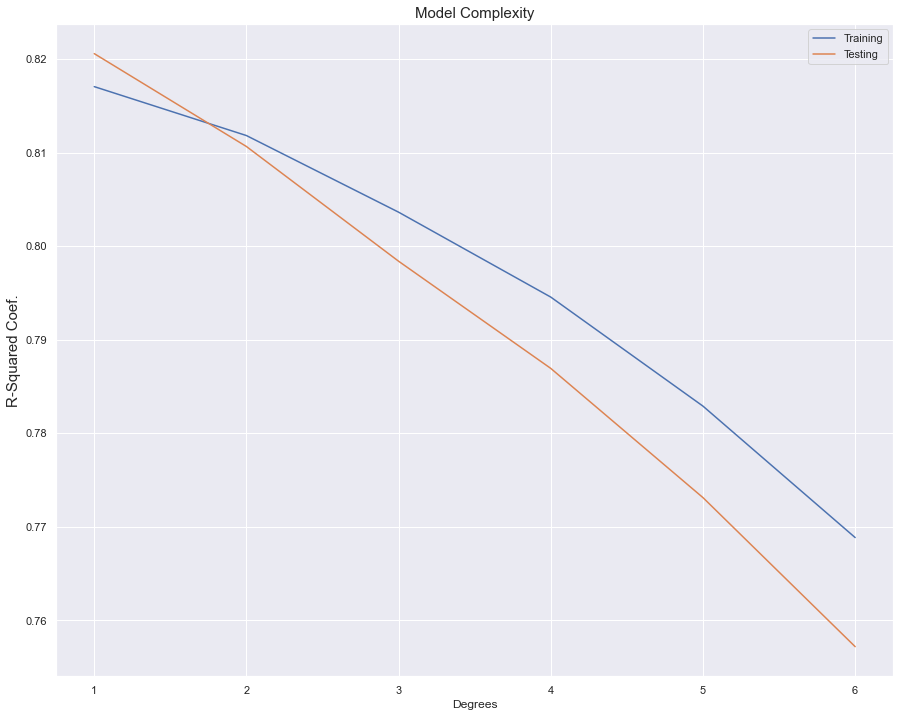

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the degree of polynomial from 1 to 6
train_r2_scores = []
test_r2_scores = []
for degree in range(1, 7):
    # Converting the features to polynomial
    model_poly = PolynomialFeatures(degree=degree)
    xtrain_poly = model_poly.fit_transform(xtrain)  # Fit-transform only once for each set
    xtest_poly = model_poly.transform(xtest)        # Transform using the same model
    
    # Initializing LassoCV
    model_lasso = LassoCV(random_state=42, n_jobs=4, cv=5)  # Fixed variable name and class instantiation
    model_lasso.fit(xtrain_poly, ytrain)
    
    # Getting the training score in the list
    train_r2_scores.append(r2_score(ytrain, model_lasso.predict(xtrain_poly)))
    test_r2_scores.append(r2_score(ytest, model_lasso.predict(xtest_poly)))
    
# Displaying the model complexity
plt.figure(figsize=(15, 12))
sns.lineplot(x=range(1, 7), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 7), y=test_r2_scores, label='Testing')
plt.xlabel('Degrees', fontsize=12)
plt.ylabel('R-Squared Coef.', fontsize=15)
plt.title('Model Complexity', fontsize=15)
plt.show()

In [42]:
list(zip(train_r2_scores, test_r2_scores))

[(0.817056397862837, 0.8205831390252152),
 (0.8118252950330801, 0.8106546294010814),
 (0.8036328552457941, 0.7983888922316117),
 (0.7945552028478606, 0.786931798126712),
 (0.7828994245859595, 0.7731189641603301),
 (0.7688489667890384, 0.7571866311971951)]

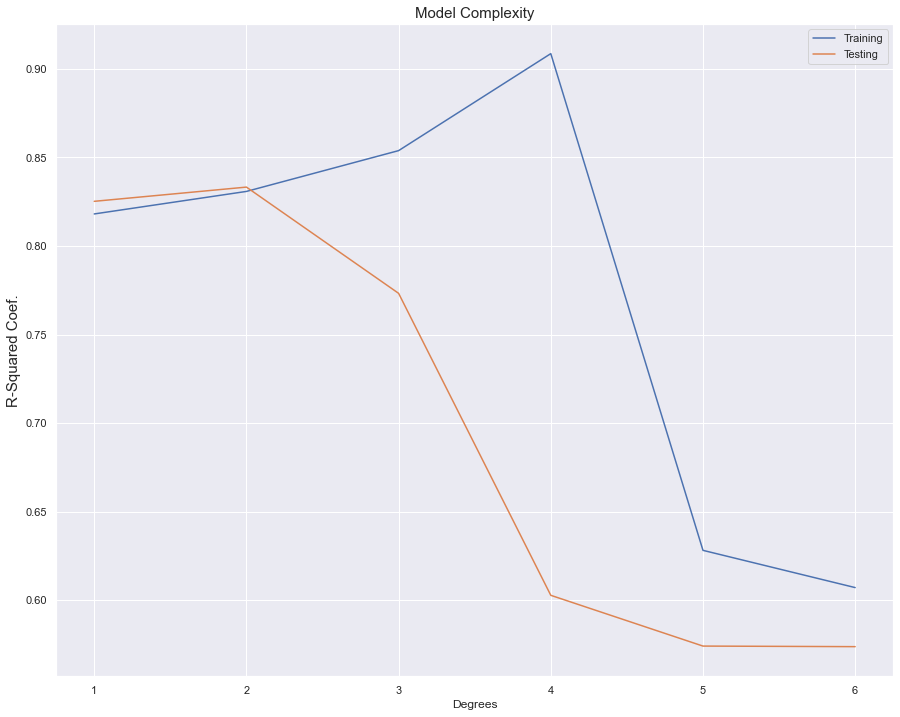

In [43]:
from sklearn.linear_model import RidgeCV
#CheCking the degree of polynomial from 1 to 6
train_r2_scores = []
test_r2_scores = []
for degree in range(1, 7):
    # Converting the features to polynomial
    model_poly = PolynomialFeatures(degree=degree)
    xtrain_poly = model_poly.fit_transform(xtrain)  # Fit-transform only once for each set
    xtest_poly = model_poly.transform(xtest)        # Transform using the same model
    
    # Initializing LassoCV
    model_ridge = RidgeCV(cv=5)  # Fixed variable name and class instantiation
    model_ridge.fit(xtrain_poly, ytrain)
    
    # Getting the training score in the list
    train_r2_scores.append(r2_score(ytrain, model_ridge.predict(xtrain_poly)))
    test_r2_scores.append(r2_score(ytest, model_ridge.predict(xtest_poly)))
    
# Displaying the model complexity
plt.figure(figsize=(15, 12))
sns.lineplot(x=range(1, 7), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 7), y=test_r2_scores, label='Testing')
plt.xlabel('Degrees', fontsize=12)
plt.ylabel('R-Squared Coef.', fontsize=15)
plt.title('Model Complexity', fontsize=15)
plt.show()

In [44]:
list(zip(train_r2_scores, test_r2_scores))

[(0.8181067830196194, 0.8252330309714186),
 (0.8308240346625836, 0.8332649801156914),
 (0.8538622132043002, 0.7732757728698585),
 (0.9086293379489839, 0.6027613408250247),
 (0.6281497708006369, 0.5740957979852915),
 (0.6071251956643429, 0.5737729800353074)]

# Applying K-NearestNeighbors Algorithm

In [45]:
# Importing KNN
from sklearn.neighbors import KNeighborsRegressor

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
x = pd.DataFrame(data=scaled, columns=data.columns)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


# Model fitting

In [47]:
# fitting the model
model_knn = KNeighborsRegressor()

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x, Y, random_state=42, test_size=0.3, shuffle=True)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(350, 8) (150, 8)
(350, 1) (150, 1)


In [49]:
model_knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [50]:
knn_pred_test = model_knn.predict(xtest)

In [51]:
knn_pred_train = model_knn.predict(xtrain)

In [52]:
knn_r2_train = r2_score(ytrain, knn_pred_train)
knn_r2_test = r2_score(ytest, knn_pred_test)
print(knn_r2_train, knn_r2_test)

0.9437915312256984 0.923124689729999


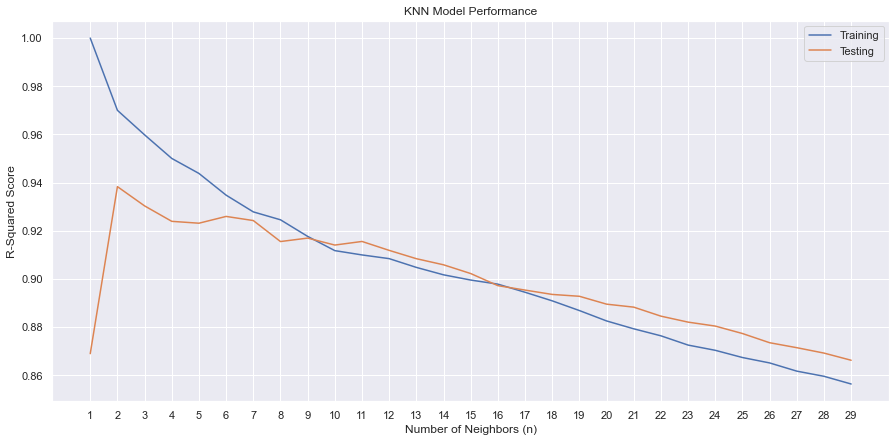

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

train_r2_scores = []
test_r2_scores = []

for n in range(1, 30):
    # Initializing KNN
    model_knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fitting the data and making predictions for both training and testing dataset
    model_knn.fit(xtrain, ytrain)
    knn_pred_train, knn_pred_test = model_knn.predict(xtrain), model_knn.predict(xtest)
    
    # Storing the R-Squared Coefficients into lists
    train_r2_scores.append(r2_score(ytrain, knn_pred_train))
    test_r2_scores.append(r2_score(ytest, knn_pred_test))

# Plotting
plt.figure(figsize=(15, 7))
sns.lineplot(x=range(1, 30), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 30), y=test_r2_scores, label='Testing')
plt.xticks(range(1, 30))
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('R-Squared Score')
plt.title('KNN Model Performance')
plt.legend()
plt.show()

# Model Complexity

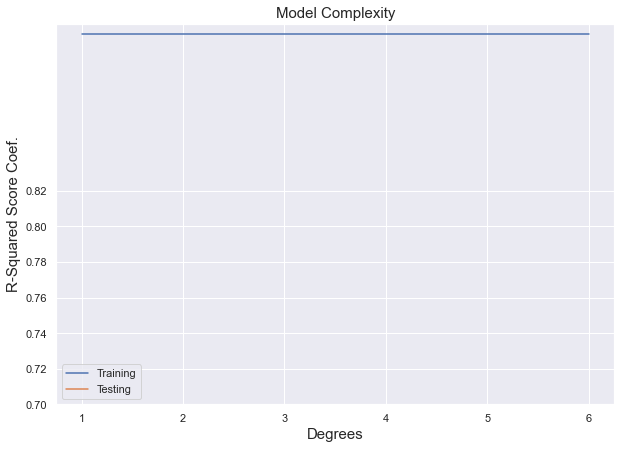

In [54]:
#Checking the degree from 1 to 6
train_r2_scores = []
test_r2_scores = []

for n in range(1, 7):
    # Converting the features to polynomial
    model_poly = PolynomialFeatures(degree=degree)
    xtrain_poly, xtest_poly = model_poly.fit_transform(xtrain), model_poly.fit_transform(xtest)
    # Initializing KNN
    model_knn = KNeighborsRegressor(n_neighbors=11)
    model_knn.fit(xtrain_poly, ytrain)
    # Getting the training score in the list
    train_r2_scores.append(r2_score(ytrain, model_knn.predict(xtrain_poly)))
    test_r2_scores.append(r2_score(ytest, model_knn.predict(xtest_poly)))
    
    # Plotting to display complexity
plt.figure(figsize=(10, 7))
sns.lineplot(x=range(1, 7), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 7), y=test_r2_scores, label='Testing')
plt.xlabel('Degrees', fontsize=15)
plt.ylabel('R-Squared Score Coef.', fontsize=15)
plt.title('Model Complexity', fontsize=15)
plt.xticks(range(1, 7))  # Set x-axis ticks for each degree
plt.yticks([0.7,0.72, 0.74, 0.76, 0.78, 0.8, 0.82])
plt.show()

In [55]:
list(zip(train_r2_scores, test_r2_scores))

[(0.9083127767281686, 0.9136475524249944),
 (0.9083127767281686, 0.9136475524249944),
 (0.9083127767281686, 0.9136475524249944),
 (0.9083127767281686, 0.9136475524249944),
 (0.9083127767281686, 0.9136475524249944),
 (0.9083127767281686, 0.9136475524249944)]